<a href="https://colab.research.google.com/github/THANHDAT202/CNN/blob/main/CNN_VNbank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#connect drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
from keras.layers import LeakyReLU
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten

from keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
import os
from keras.preprocessing.image import ImageDataGenerator
from google.colab import drive
from tensorflow.keras.utils import to_categorical

In [ ]:
# Khai báo đường dẫn tới thư mục chứa dữ liệu
data_dir = '/content/drive/MyDrive/BT1/VN banknotes'

In [ ]:
# Tạo các tập train, validation và test bằng cách sử dụng ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2) # Chia dữ liệu thành tập train và validation
test_datagen = ImageDataGenerator(rescale=1./255)


In [ ]:
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training') # Lấy tập train từ tập chia theo validation_split
valid_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation') # Lấy tập validation từ tập chia theo validation_split


Found 120 images belonging to 6 classes.
Found 25 images belonging to 6 classes.


In [ ]:
test_generator = test_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False) # Không shuffle tập test

Found 145 images belonging to 6 classes.


In [ ]:
train_generator.class_indices


{'100000d': 0,
 '10000d': 1,
 '200000d': 2,
 '20000d': 3,
 '500000d': 4,
 '50000d': 5}

In [ ]:
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout,Flatten,Conv2D, MaxPooling2D, Normalization         #dense :full conected ANN
from keras.layers import LeakyReLU
from keras.optimizers import Adam
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(6, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Huấn luyện mô hình với các tập train và validation được chia trên
train=model.fit(train_generator, epochs=50, validation_data=valid_generator)

Epoch 1/50
4/4 [==============================] - 26s 6s/step - loss: 5.6256 - accuracy: 0.1667 - val_loss: 2.1283 - val_accuracy: 0.1600
Epoch 2/50
4/4 [==============================] - 21s 5s/step - loss: 1.9695 - accuracy: 0.1417 - val_loss: 1.7495 - val_accuracy: 0.2400
Epoch 3/50
4/4 [==============================] - 22s 6s/step - loss: 1.7347 - accuracy: 0.3083 - val_loss: 1.6695 - val_accuracy: 0.2400
Epoch 4/50
4/4 [==============================] - 21s 5s/step - loss: 1.6218 - accuracy: 0.2750 - val_loss: 1.5535 - val_accuracy: 0.2800
Epoch 5/50
4/4 [==============================] - 21s 5s/step - loss: 1.6266 - accuracy: 0.2667 - val_loss: 1.7383 - val_accuracy: 0.2800
Epoch 6/50
4/4 [==============================] - 22s 5s/step - loss: 1.6822 - accuracy: 0.4000 - val_loss: 1.5840 - val_accuracy: 0.3200
Epoch 7/50
4/4 [==============================] - 21s 5s/step - loss: 1.4589 - accuracy: 0.4417 - val_loss: 1.4145 - val_accuracy: 0.5200
Epoch 8/50
4/4 [==================

In [ ]:
test_loss,test_acc = model.evaluate(train_generator)
print('độ chính xác trên tập kiểm tra', test_acc)
print('hàm mất mát trên tập kiểm ta', test_loss)

4/4 [==============================] - 8s 1s/step - loss: 0.0087 - accuracy: 1.0000
độ chính xác trên tập kiểm tra 1.0
hàm mất mát trên tập kiểm ta 0.00868806429207325


In [ ]:
#lưu
from keras.models import load_model
model.save("VNbank(CNN).h5")
model_1=load_model('VNbank(CNN).h5')


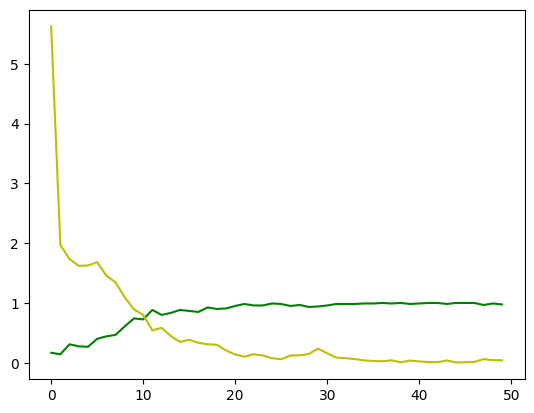

In [ ]:
import matplotlib.pyplot as plt      
accuracy = train.history['accuracy']
loss = train.history['loss']    
epochs = range(len(accuracy))
plt.plot(epochs,accuracy,'g',label = 'Training accuracy')
plt.plot(epochs,loss,'y',label = 'Training loss')
plt.show()


Saving hinhtien8.jpg to hinhtien8.jpg
1/1 [==============================] - 0s 75ms/step
[[0. 0. 1. 0. 0. 0.]]
Giá trị dự đoán:  200000d


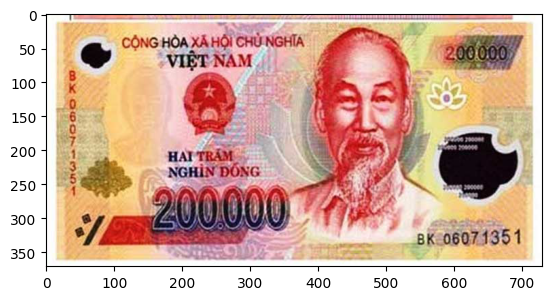

In [ ]:
from google.colab import files
from keras.preprocessing import image
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

uploaded=files.upload()

for fn in uploaded.keys():
  #predicting images
  path='/content/'+fn
  #In ảnh đọc được
  plt.imshow(mpimg.imread(path))

  img=load_img(path,target_size=(224,224))
  x=img_to_array(img)
  x=np.expand_dims(x,axis=0)
  images=np.vstack([x])
  y_predict = model.predict(images,batch_size=10)
  label=['100000d',
 '10000d',
 '200000d',
 '20000d',
 '500000d',
 '50000d']
  print(y_predict)
  print('Giá trị dự đoán: ', label[np.argmax(y_predict)])